# Efficient AD Model For Anomaly Detection

# Summary

- Introduction
- Before running the notebook
- Model evaluation

## Introduction

Run this ONLY after running `2_efficientad.ipynb`.  

Used for local testing. You specify a model and it will test the model on few images on the three datasets.  
So you'll the model performing weirdly on 2 datsets everytime and that's normal, it's just for the sake of simplicity and laziness.

## Model evaluation

In [8]:
import sys  # Import the sys module, required to access system-specific parameters and functions  
sys.path.append('../code/')  # Add the '../code/' directory to the path that Python looks in for files to import  
  
# Import all functions from the efficientad_inference module  
from efficientad_inference import *

In [9]:
# Configuration dictionary containing the parameters for a system or model setup  
config = {  
    "seed": 42,  # Seed for reproducibility  
    "on_gpu": torch.cuda.is_available(),  # Boolean flag to use GPU if available  
      
    "out_channels": 384,  # Number of output channels  
    "image_size": 256,  # Size of the images (assumed square: 256x256 pixels)  
      
    "import_path": "../output/efficientad/cookies_3"  # Path to import data or model  
}

In [10]:
# Load training output
models = torch.load(f"{config['import_path']}/all_models.pth", map_location=torch.device('cpu'))

map_normalization = torch.load(f"{config['import_path']}/map_normalization.pth", map_location=torch.device('cpu')) 
 
with open(f"{config['import_path']}/best_threshold.pkl", 'rb') as file:  
    best_threshold = pickle.load(file) 


In [11]:
print("models", models.keys())
print("map_normalization",map_normalization)
print("best_threshold", best_threshold)

models dict_keys(['teacher_mean', 'teacher_std', 'teacher', 'student', 'autoencoder'])
map_normalization {'q_st_start': tensor(0.4960), 'q_st_end': tensor(0.7702), 'q_ae_start': tensor(0.0387), 'q_ae_end': tensor(0.7121)}
best_threshold 0.39974925


In [12]:
efficientad = EfficientADInference(
    config=config,
    models=models,
    map_normalization=map_normalization,
    threshold=best_threshold,
)

- Setting seed to 42
- OK - Setting seed to 42 (0.97 ms)



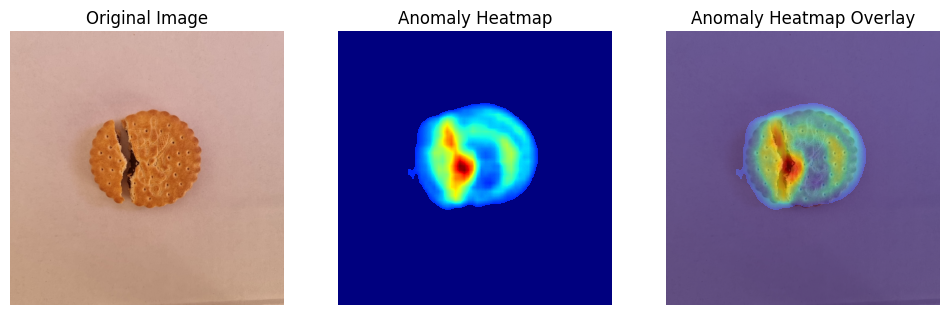

Score: 2.435419 Classification: anomaly


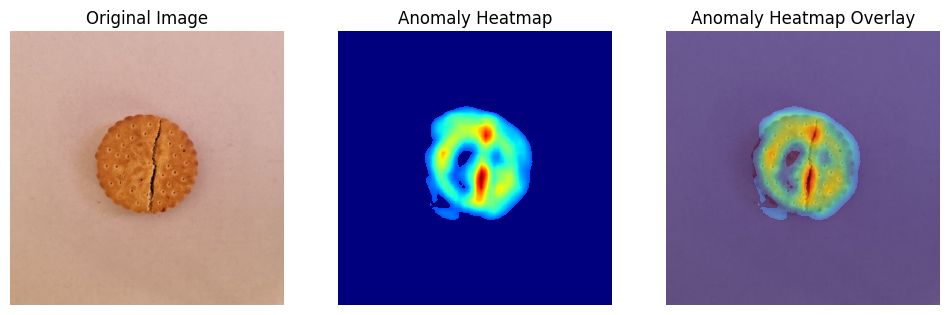

Score: 1.9606745 Classification: anomaly


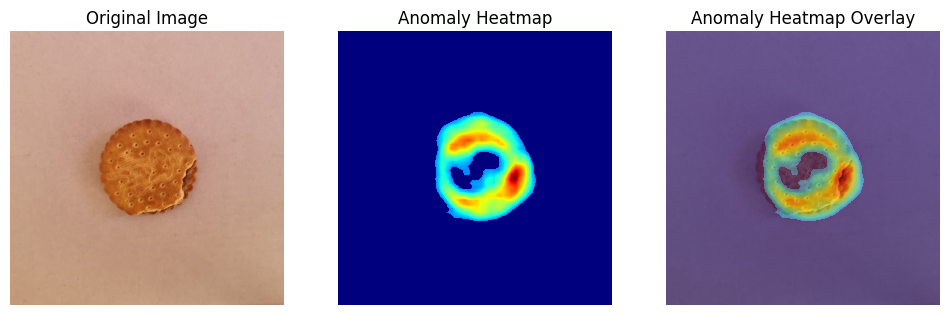

Score: 1.5662732 Classification: anomaly


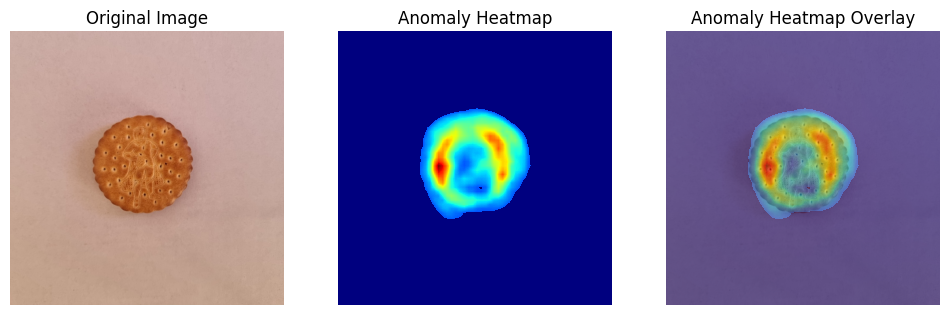

Score: 1.9259492 Classification: anomaly


In [13]:
score, classification, _ = efficientad.inference_by_image_path("datasets/cookies_1/anomaly_lvl_1/20240417_113156.jpg", True)
print("Score:", score, "Classification:",classification)
score, classification, _ = efficientad.inference_by_image_path("datasets/cookies_1/anomaly_lvl_2/20240417_114410.jpg", True)
print("Score:", score, "Classification:",classification)
score, classification, _ = efficientad.inference_by_image_path("datasets/cookies_1/anomaly_lvl_3/20240417_114906.jpg", True)
print("Score:", score, "Classification:",classification)

score, classification, _ = efficientad.inference_by_image_path("datasets/cookies_1/no_anomaly/20240417_111705.jpg", True)
print("Score:", score, "Classification:",classification)

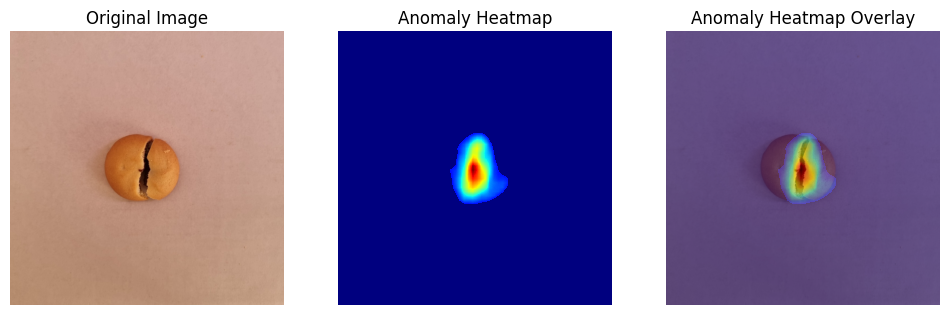

Score: 2.9115613 Classification: anomaly


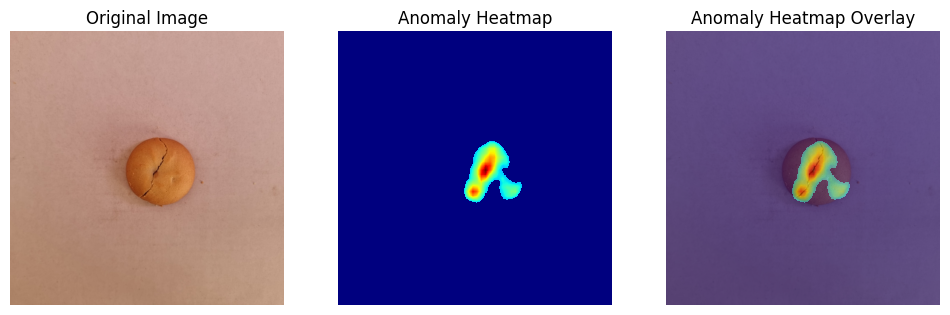

Score: 1.2644352 Classification: anomaly


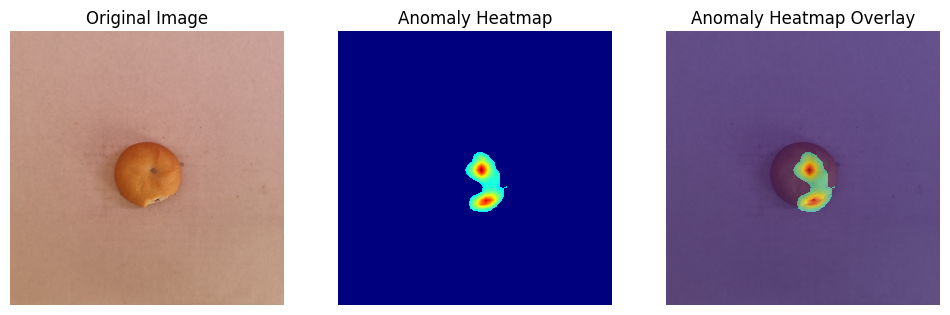

Score: 1.1731781 Classification: anomaly


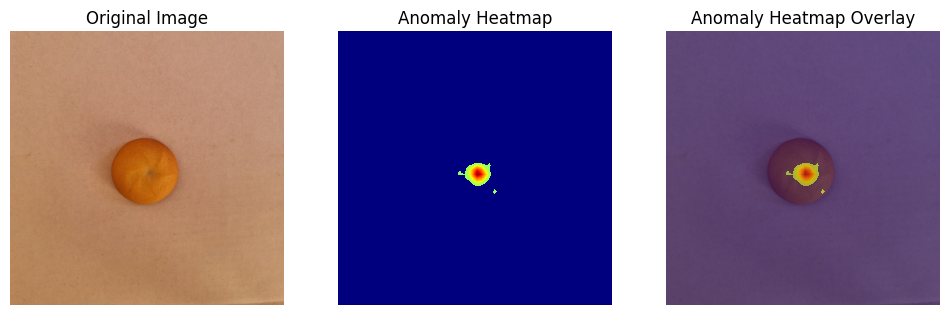

Score: 0.7765157 Classification: anomaly


In [14]:
score, classification, _ = efficientad.inference_by_image_path("datasets/cookies_2/anomaly_lvl_1/20240417_140820.jpg", True)
print("Score:", score, "Classification:",classification)
score, classification, _ = efficientad.inference_by_image_path("datasets/cookies_2/anomaly_lvl_2/20240417_141840.jpg", True)
print("Score:", score, "Classification:",classification)
score, classification, _ = efficientad.inference_by_image_path("datasets/cookies_2/anomaly_lvl_3/20240417_142108.jpg", True)
print("Score:", score, "Classification:",classification)

score, classification, _ = efficientad.inference_by_image_path("datasets/cookies_2/no_anomaly/20240417_133020.jpg", True)
print("Score:", score, "Classification:",classification)

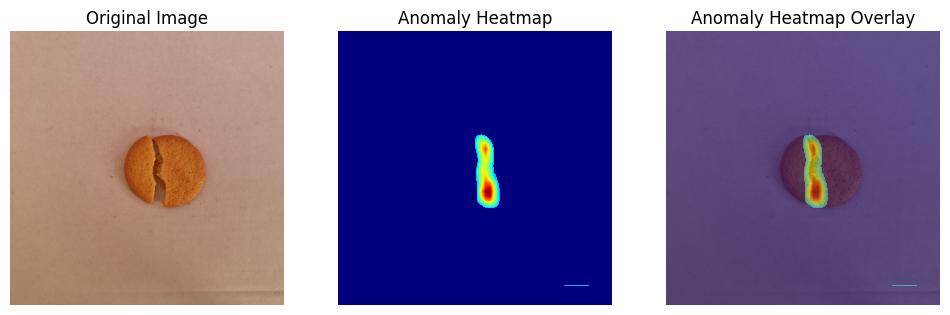

Score: 1.3852909 Classification: anomaly


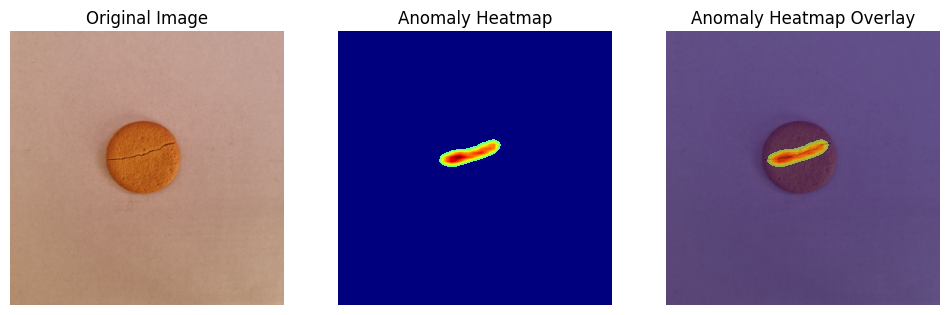

Score: 0.9247022 Classification: anomaly


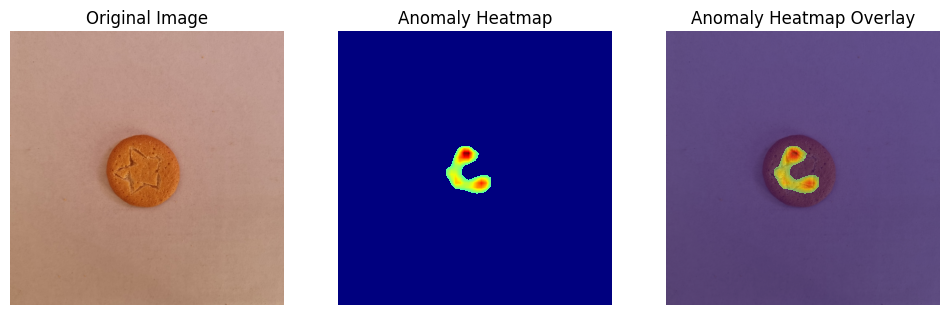

Score: 0.92297536 Classification: anomaly


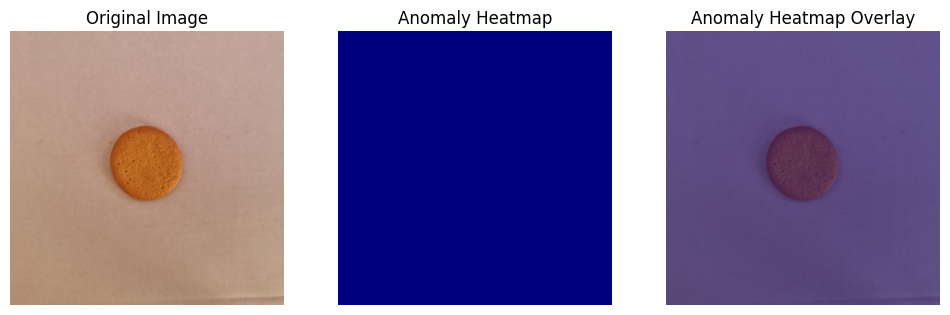

Score: 0.08237229 Classification: no_anomaly


In [15]:
score, classification, _ = efficientad.inference_by_image_path("datasets/cookies_3/anomaly_lvl_1/20240417_134753.jpg", True)
print("Score:", score, "Classification:",classification)
score, classification, _ = efficientad.inference_by_image_path("datasets/cookies_3/anomaly_lvl_2/20240417_135621.jpg", True)
print("Score:", score, "Classification:",classification)
score, classification, _ = efficientad.inference_by_image_path("datasets/cookies_3/anomaly_lvl_3/20240417_140517.jpg", True)
print("Score:", score, "Classification:",classification)

score, classification, _ = efficientad.inference_by_image_path("datasets/cookies_3/no_anomaly/20240417_134254.jpg", True)
print("Score:", score, "Classification:",classification)
